In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
import cufflinks as cf
cf.go_offline()

In [4]:
df = pd.read_csv('./igae_mensual_csv/conjunto_de_datos/conjunto_de_datos_igae_igae_ivf2020-02.csv',index_col='Descriptores')


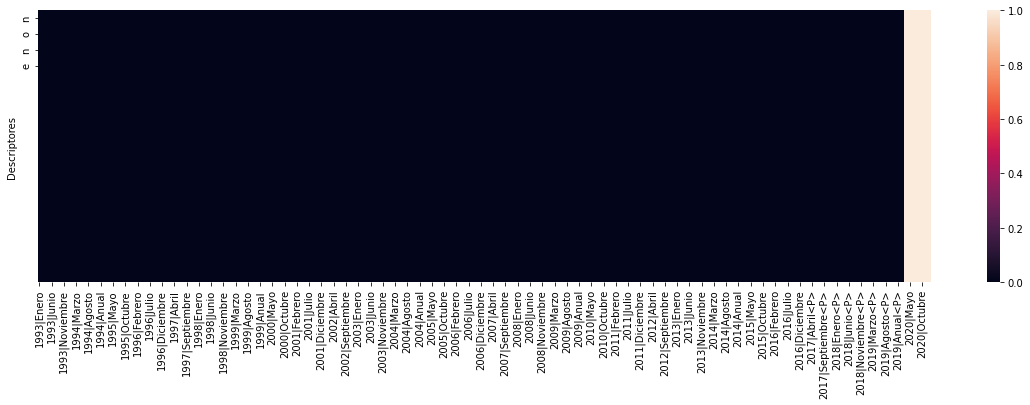

In [5]:
df.head(16)
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels='none',)

In [12]:
df.keys()

Index(['1993|Enero', '1993|Febrero', '1993|Marzo', '1993|Abril', '1993|Mayo',
       '1993|Junio', '1993|Julio', '1993|Agosto', '1993|Septiembre',
       '1993|Octubre',
       ...
       '2020|Abril', '2020|Mayo', '2020|Junio', '2020|Julio', '2020|Agosto',
       '2020|Septiembre', '2020|Octubre', '2020|Noviembre', '2020|Diciembre',
       '2020|Anual'],
      dtype='object', length=364)

In [13]:
vector_resultado = df.loc['Total',:'2020|Febrero<P>'].values

In [14]:
vector_datos = df.loc[['Actividades primarias','Actividades secundarias','Actividades terciarias'],:'2020|Febrero<P>'].values


In [15]:
vector_resultado.shape

(353,)

In [16]:
vector_datos = vector_datos.transpose()
vector_datos.shape

(353, 3)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [18]:
x_train,x_test,y_train,y_test = train_test_split(vector_datos,vector_resultado,test_size=0.2)

In [19]:
lr_multiple = linear_model.LinearRegression()

In [20]:
lr_multiple.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred_multiple = lr_multiple.predict(x_test)

In [22]:
coef = lr_multiple.coef_
coef

array([0.03159327, 0.34158778, 0.62681895])

In [23]:
index = ['Primer sector','Segundo sector','Tercer sector']
dfcoef = pd.DataFrame(index=index,columns=['Coeficiente'],data=coef)
dfcoef.iplot(kind='bar',title='Participación por Sector')

In [24]:
vector_resultado = df.loc['Actividades terciarias',:'2020|Febrero<P>'].values
vector_datos = df.loc['Actividades terciarias|43---Comercio al por mayor':,:'2020|Febrero<P>'].values

In [25]:
vector_resultado.shape

(353,)

In [26]:
vector_datos = vector_datos.transpose()
vector_datos.shape

(353, 9)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(vector_datos,vector_resultado,test_size=0.2)

In [28]:
lr_multiple = linear_model.LinearRegression()

In [29]:
lr_multiple.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred_multiple = lr_multiple.predict(x_test)

In [31]:
coef = lr_multiple.coef_
coef

array([0.13525796, 0.15293612, 0.14042756, 0.23811429, 0.08938802,
       0.09946233, 0.03759032, 0.03623396, 0.07058945])

In [32]:
index = df.transpose().loc[:,'Actividades terciarias|43---Comercio al por mayor':].keys()
dfcoef = pd.DataFrame(index=index,columns=['Coeficiente'],data=coef)

In [34]:
dfcoef.iplot(kind='bar')

Text(0.5, 1.0, 'Actividades Terciarias')

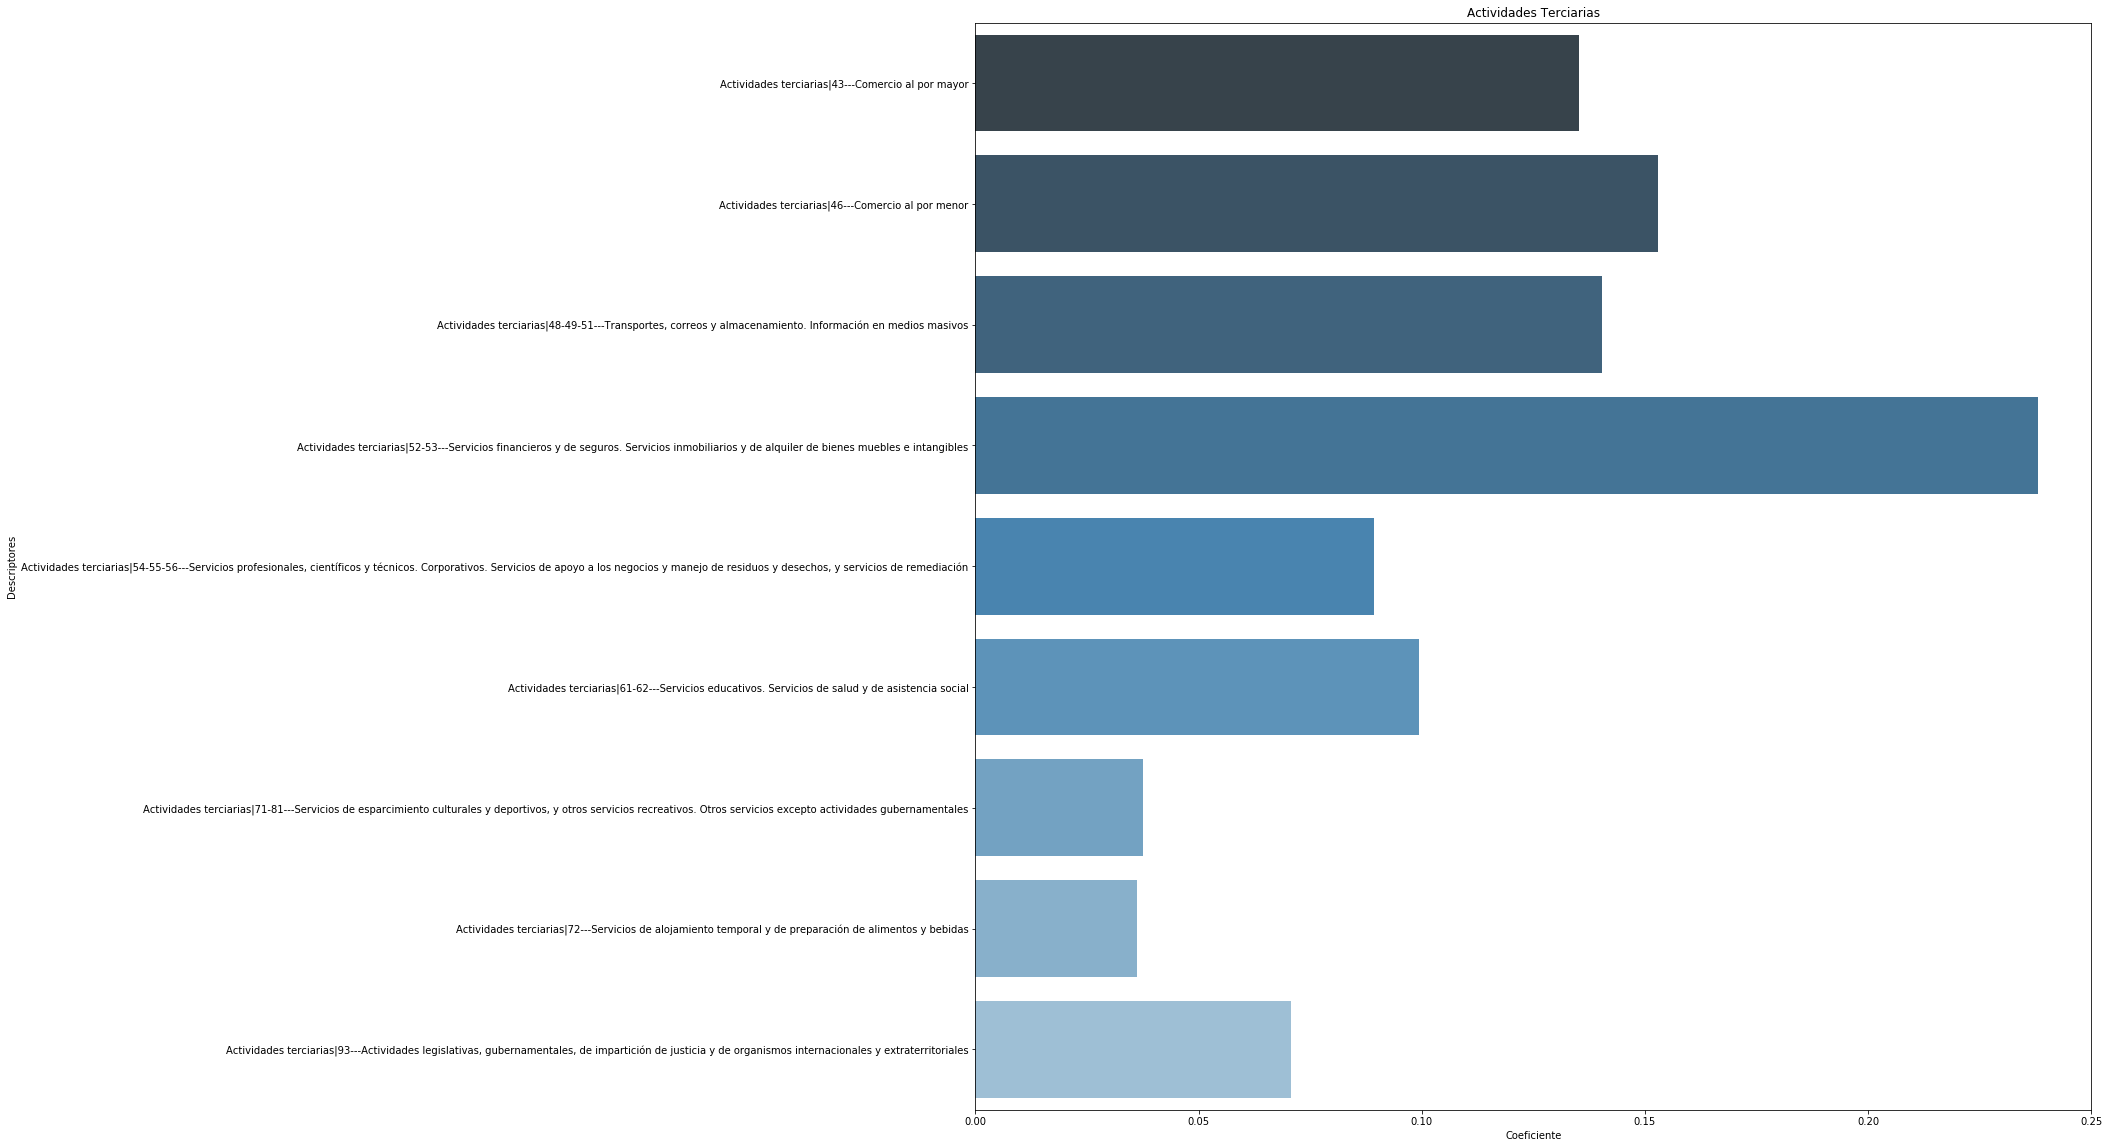

In [250]:
plt.figure(figsize=(20,20))
terc = sns.barplot(x='Coeficiente',data=dfcoef,y=index,palette='Blues_d')
terc.set_title('Actividades Terciarias')

In [150]:
df.transpose().loc[['2017|Febrero<P>','2018|Febrero<P>','2019|Febrero<P>','2020|Febrero<P>'],['Actividades primarias','Actividades secundarias','Actividades terciarias']].iplot(kind="bar",title='Crecimiento por Actividades por Año',barmode='stack')



In [134]:
df1 = pd.read_csv('asg-2019-12-31.csv',encoding='latin-1',sep='|',index_col='cve_delegacion')

In [135]:
df1.tail()

,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,rango_salarial,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
cve_delegacion,,,,,,,,,,,,,,,,,,,,,
40,58,9,NaN,9.0,99.0,9900.0,S3,2,E5,W8,...,1,0,0,1,0,816.21,0.00,0.0,816.21,0.0
40,58,9,NaN,9.0,99.0,9900.0,S3,2,E6,W14,...,1,0,0,1,0,1394.24,0.00,0.0,1394.24,0.0
40,58,9,NaN,9.0,99.0,9900.0,S3,2,E6,W3,...,1,1,0,0,0,291.87,291.87,0.0,0.00,0.0
40,58,9,NaN,9.0,99.0,9900.0,S3,2,E7,W21,...,1,0,0,1,0,2112.25,0.00,0.0,2112.25,0.0
40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,W21,...,1,0,0,1,0,2112.25,0.00,0.0,2112.25,0.0


In [137]:
x = df1['masa_sal_ta'].groupby(df1['cve_entidad']).sum()
x = x.rename(columns={'masa_sal_ta': 'empleo asegurado 2019'})

In [ ]:
df2 = pd.read_csv('asg-2020-03-31_0.csv',encoding='latin-1',sep='|',index_col='cve_delegacion')

In [123]:
df2.head()
df2['tamaño_patron'].unique()

array([nan, 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'], dtype=object)

In [138]:
y = df2['masa_sal_ta'].groupby(df2['cve_entidad']).sum()
y = y.rename(columns={'masa_sal_ta': 'empleo asegurado 2020'})

In [139]:
frames = [x,y]

In [148]:
z =pd.concat(frames, join='inner',axis=1)
z = z.rename(columns={0: 'MT de EA 2019',
                      1: 'MT de EA 2020'})
z

,MT de EA 2019,MT de EA 2020
cve_entidad,,
1,1.172460e+08,1.299416e+08
2,3.569076e+08,3.777324e+08
3,6.308214e+07,6.632105e+07
4,5.677129e+07,5.958710e+07
5,2.965575e+08,3.064427e+08
6,4.399693e+07,4.673299e+07
7,7.172016e+07,7.579928e+07
8,3.320597e+08,3.507931e+08
9,1.634040e+09,1.722309e+09


In [149]:
z.iplot(title='Empleo asegurado por Estado')